Explained variance ratios (PCA):
[0.72962445 0.22850762]


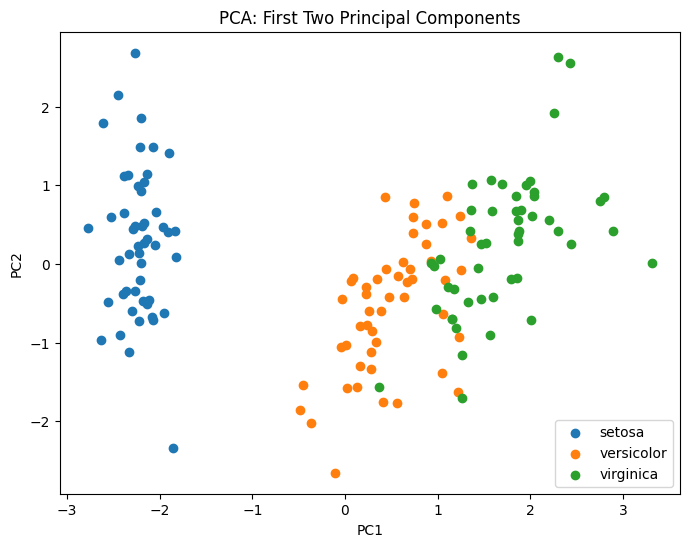

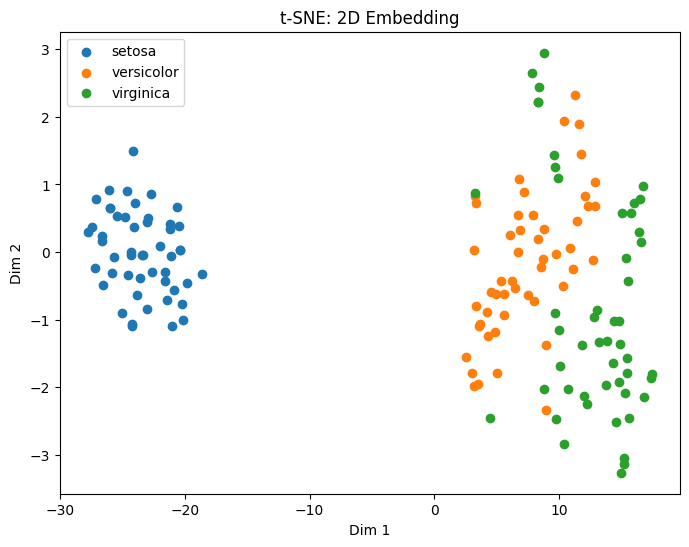

In [ ]:
# --- Load Libraries ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler

# Load the Iris dataset
iris = load_iris()
X = iris.data
y = iris.target
target_names = iris.target_names

# Standardize the data (important for PCA and t-SNE)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA to reduce to 2 components
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Explained variance ratios
print("Explained variance ratios (PCA):")
print(pca.explained_variance_ratio_)

# PCA visualization
plt.figure(figsize=(8,6))
for i, target in enumerate(np.unique(y)):
    plt.scatter(X_pca[y == target, 0], X_pca[y == target, 1], label=target_names[i])

plt.title("PCA: First Two Principal Components")
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.legend()
plt.show()

# Apply t-SNE
tsne = TSNE(n_components=2, perplexity=30, random_state=42)
X_tsne = tsne.fit_transform(X_scaled)

# t-SNE visualization
plt.figure(figsize=(8,6))
for i, target in enumerate(np.unique(y)):
    plt.scatter(X_tsne[y == target, 0], X_tsne[y == target, 1], label=target_names[i])

plt.title("t-SNE: 2D Embedding")
plt.xlabel("Dim 1")
plt.ylabel("Dim 2")
plt.legend()
plt.show()

# PCA explains variance directly (about 96% in the first two components), while t-SNE does not provide an explained variance metric.
# Instead, t-SNE focuses on preserving local neighborhood relationships, which is why clusters appear more clearly separated despite lacking a variance-based interpretation.

# PCA projects the data onto directions of maximum variance,
# preserving global structure but allowing some class overlap.

# t-SNE preserves local neighborhood relationships,
# which can make clusters appear more separated than in PCA.

